## Metody Nieparametryczne w Statystyce
# Zadanie 1:
Za pomocą odpowiednich symulacji porównać moce testu Shapiro-Wilka, testu Kołmogorowa i testu 𝜒2 (z hipotezą główną, że cecha ma rozkład normalny) w przypadku, gdy dane pochodzą z rozkładu 𝑡-Studenta lub innej klasy rozkładów symetrycznych (uwaga: żeby wyniki były porównywalne trzeba pamiętać o standaryzacji danych).
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek

In [6]:
import numpy as np, pandas as pd
import math
from scipy.stats import kstest, shapiro, chisquare, norm
from sklearn import preprocessing

# wyciszenie ostrzeżeń dla testu chi kwadrat 
# który zwraca uwagę na to, że w niektórych przedziałach nie ma obserwacji
import warnings
warnings.filterwarnings('ignore')

2. Moce testów w zależności od liczby danych (5-100 wartości, stopnie swobody: 15)

<Axes: xlabel='Sample Count', ylabel='Test Power'>

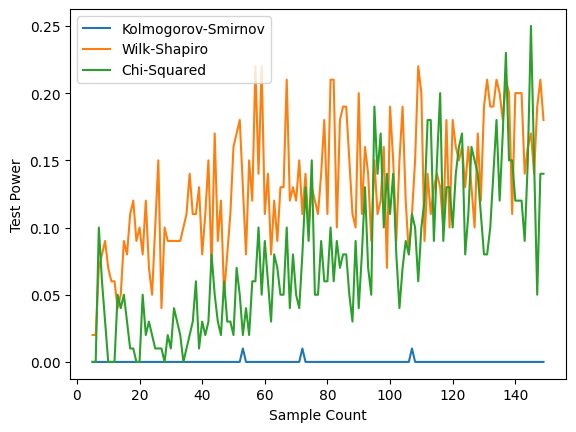

In [9]:
results = pd.DataFrame(columns=["Kolmogorov-Smirnov", "Wilk-Shapiro", "Chi-Squared"])
buf = []

for n in range (5, 150): 
    for i in range (0, 100):
        # generowanie wektora z rozkładu t-Studenta o długości m i standaryzacja
        x = preprocessing.scale(np.random.standard_t(15, n))

        # testy kolmogorova-smirnova i shapiro-wilka
        buf.append(kstest(x, 'norm')[1] < .05)
        buf.append(shapiro(x)[1] < .05)

        # przeksztalcenie danych do testu chi-kwadrat
        # dzielenie na pierwiastek z n przedziałów
        xcat = np.histogram(x, bins=round(math.sqrt(n)))[0]
        xnorm = np.random.normal(0, 1, n)
        xnormcat = np.histogram(xnorm, bins=round(math.sqrt(n)))[0]

        # obliczenie częstości występowania w przedziałach
        xcatfreqs = xcat / np.sum(xcat)
        xnormcatfreqs = xnormcat / np.sum(xnormcat)
        
        # test chi-kwadrat
        buf.append(chisquare(xcatfreqs, xnormcatfreqs)[1] < .05)

    results.loc[n] = [ np.mean(buf[0::3]), np.mean(buf[1::3]), np.mean(buf[2::3]) ]    
    buf = []

results.plot(xlabel="Sample Count",ylabel="Test Power",legend=True)

Tak jak można było się spodziewać, wraz ze wzrostem próbki rośnie też zauważalność różnic pomiędzy rozkładami, przez co statystyczna moc testu rośnie.

3. Moce testów w zależności od liczby stopni swobody (3-25 stopni swobody, liczba danych: 25)

<Axes: xlabel='Degrees of Freedom', ylabel='Test Power'>

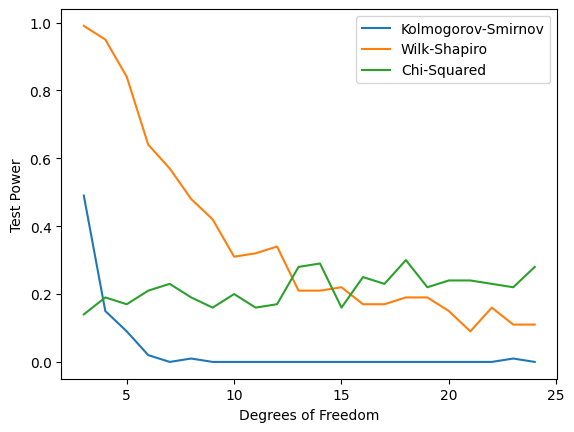

In [13]:
results = pd.DataFrame(columns=["Kolmogorov-Smirnov", "Wilk-Shapiro", "Chi-Squared"])
buf = []

for m in range (3, 25): 
    for i in range (0, 100):
        #generowanie wektora z rozkładu t-Studenta o długości m i standaryzacja
        x = preprocessing.scale(np.random.standard_t(m, 200))
        #generowanie wektora z rozkładu normalnego o długości m
        xnorm = np.random.normal(0, 1, 200)

        #testy
        buf.append(kstest(x, 'norm', args=(0, 1))[1] < 0.05)
        buf.append(shapiro(x)[1] < 0.05)

        #przeksztalcenie danych do testu chi-kwadrat
        xcat = np.histogram(x, bins=15)[0]
        xnormcat = np.histogram(xnorm, bins=15)[0]

        #obliczenie częstości występowania w przedziałach
        xcatfreqs = xcat / np.sum(xcat)
        xnormcatfreqs = xnormcat / np.sum(xnormcat)
        #test chi-kwadrat
        buf.append(chisquare(xcatfreqs, xnormcatfreqs)[1] < .05)

    results.loc[m] = [ np.mean(buf[0::3]), np.mean(buf[1::3]), np.mean(buf[2::3]) ]    
    buf = []

results.plot(xlabel="Degrees of Freedom",ylabel="Test Power",legend=True)

Moc testu maleje ze wzrostem stopni swobody, ponieważ rozkład t-Studenta staje się coraz bardziej podobny do rozkładu normalnego dla wysokich wartości df.